# Travelling Salesman Problem

## Genetic Algorithm Approach

In [2]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

## City class

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

## Fitness class

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

## Create Route From the CityList

In [4]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

## Create initial Population by looping with population size

In [5]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

## Determine Fitness => Rank Routes => To simulate our “survival of the fittest”
### Our output will be an ordered list with the route IDs and each associated fitness score.

In [6]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
    #Our output will be an ordered list with the route IDs and each associated fitness score.

### the selection function returns a list of route IDs for mating pool

In [7]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

## Construct mating pool => list of list => routes to select from

In [8]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

## Crossover

In [9]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [10]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [11]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [12]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [13]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [26]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [39]:
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [28]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Initial distance: 1939.0701018211093
Final distance: 943.256844402943


[(104,65),
 (89,10),
 (98,0),
 (150,6),
 (171,10),
 (199,23),
 (165,18),
 (149,20),
 (140,35),
 (143,80),
 (154,101),
 (180,119),
 (173,131),
 (179,185),
 (163,162),
 (109,132),
 (46,84),
 (30,86),
 (7,57),
 (10,132),
 (3,166),
 (9,179),
 (7,194),
 (54,138),
 (74,76)]

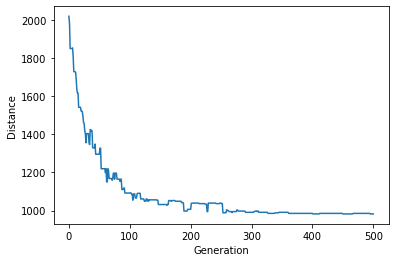

In [40]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

## Dynamic Programming Approach

In [3]:
def SetCostMatrix(num):
    cmatrix = {}
    for i in range(1, num + 1):
        for j in range(1, num + 1):
            if i == j:
                cmatrix[(i, j)] = 0
            else:
                cmatrix[(i, j)] = random.randint(10, 50)
    return cmatrix

In [4]:
def GetCostVal(row, col, source):
    if col == 0:
        col = source
        return num_cities[(row, col)]
    return num_cities[(row, col)]

In [5]:
total_num = 10
num_cities = SetCostMatrix(total_num)

In [6]:
iterative_process = []
def TSPGetMinDistance(main_source, source, cities):
    if len(cities) == 1:
        minDis = GetCostVal(source, cities[0], main_source) + GetCostVal(cities[0], 0, main_source)
        return minDis
    else:
        Dist = []
        for city in cities:
            dcities = cities[:]
            dcities.remove(city)
            Dist.append(GetCostVal(source, city, source) + TSPGetMinDistance(main_source, city, dcities))
        iterative_process.append(Dist)
        return min(Dist)

In [7]:
print(TSPGetMinDistance(1, 1, [2, 3, 4]))
print(iterative_process[-1])

108
[108, 127, 120]


## Visualization of the algoritm

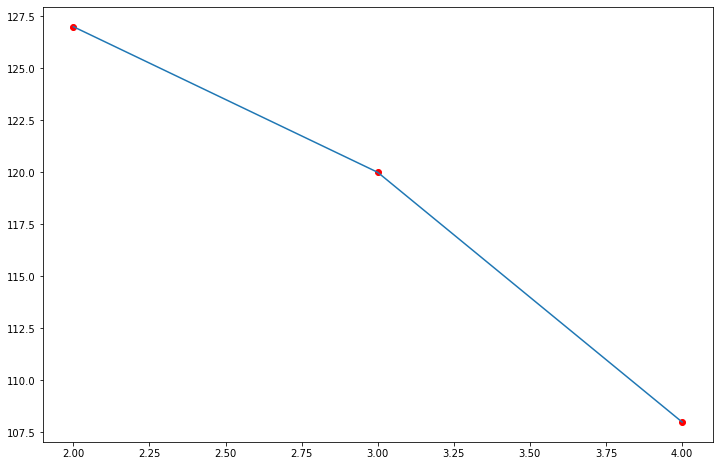

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
final_costs = sorted(iterative_process[-1])
final_costs = final_costs[::-1]
plt.scatter(list(range(2, len(final_costs) + 2)), final_costs, color='red')
plt.plot(list(range(2, len(final_costs) + 2)), final_costs)
plt.show()